In [ ]:
!nvidia-smi

Thu Jul  1 15:21:11 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"krishnarohit2110","key":"b052d37c4fc51c89c232a08b14f78613"}'}

In [ ]:
! mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d chiragsoni/ferdata
!unzip /content/ferdata.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [ ]:
# import the required libraries

import numpy as np # linear algebra
import pandas as pd 
import cv2
import os
import matplotlib.pyplot as plt
import tensorflow as tf 
from keras.preprocessing.image import ImageDataGenerator
from IPython.display import Image
import keras
from keras import models,layers
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, Conv2D,MaxPooling2D,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.utils import to_categorical

In [ ]:
def loadImages(path):
    imagesList = os.listdir(path)
    loadedImages = []
    for image in imagesList:
        img = cv2.imread(path + image)
        img = cv2.resize(img, (50, 50))

        loadedImages.append(img)

    return loadedImages

In [ ]:
path = "/content/train/"
angry = path + "angry/"
disgust = path + "disgust/"
fear = path + "fear/"
happy = path + "happy/"
neutral = path + "neutral/"
sad = path + "sad/"
surprise = path + "surprise/"

file_anger=loadImages(angry)
file_disgust = loadImages(disgust)
file_fear = loadImages(fear)
file_happy = loadImages(happy)
file_neutral = loadImages(neutral)
file_sad = loadImages(sad)
file_surprise = loadImages(surprise)


total_X =[]
label= []


for i in range(len(file_anger)):
    total_X.append(file_anger[i])
    label.append("0")
    
for i in range(len(file_disgust)):
    total_X.append(file_disgust[i])
    label.append("1")

for v in range(len(file_fear)):
    total_X.append(file_fear[v])
    label.append("2")

for n in range(len(file_happy)):
    total_X.append(file_happy[n])
    label.append("3")

for l in range (len (file_neutral)):
    total_X.append (file_neutral[l])
    label.append ("4")
    
for i in range(len(file_sad)):
    total_X.append(file_sad[i])
    label.append("5")

for a in range(len(file_surprise)):
    total_X.append(file_surprise[a])
    label.append("6")


total_X = np.asarray(total_X)
label = np.asarray(label)
label = to_categorical(label)

In [ ]:
test_path = "/content/test/"
angry = test_path + "angry/"
disgust = test_path + "disgust/"
fear = test_path + "fear/"
happy = test_path + "happy/"
neutral = test_path + "neutral/"
sad = test_path + "sad/"
surprise = test_path + "surprise/"

file_anger=loadImages(angry)
file_disgust = loadImages(disgust)
file_fear = loadImages(fear)
file_happy = loadImages(happy)
file_neutral = loadImages(neutral)
file_sad = loadImages(sad)
file_surprise = loadImages(surprise)

total_y =[]
label_y= []


for i in range(len(file_anger)):
    total_y.append(file_anger[i])
    label_y.append("0")
    
for i in range(len(file_disgust)):
    total_y.append(file_disgust[i])
    label_y.append("1")

for v in range(len(file_fear)):
    total_y.append(file_fear[v])
    label_y.append("2")

for n in range(len(file_happy)):
    total_y.append(file_happy[n])
    label_y.append("3")

for l in range (len (file_neutral)):
    total_y.append (file_neutral[l])
    label_y.append ("4")
    
for i in range(len(file_sad)):
    total_y.append(file_sad[i])
    label_y.append("5")

for a in range(len(file_surprise)):
    total_y.append(file_surprise[a])
    label_y.append("6")


total_y = np.asarray(total_y)
label_y = np.asarray(label_y)

label_y = to_categorical(label_y)

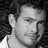

In [ ]:
Image(filename='/content/train/angry/Training_10120469.jpg') 

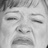

In [ ]:
Image(filename = '/content/train/disgust/Training_11050021.jpg')

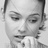

In [ ]:
Image(filename = '/content/train/fear/Training_10614740.jpg')

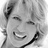

In [ ]:
Image(filename = '/content/train/happy/Training_10080933.jpg')

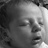

In [ ]:
Image(filename = '/content/train/neutral/Training_10175776.jpg')

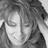

In [ ]:
Image(filename = '/content/train/sad/Training_10022789.jpg')

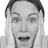

In [ ]:
Image(filename = '/content/train/surprise/Training_1002457.jpg')

In [ ]:
# now define label_to_text 
#['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy']
label_to_text={0:"surprise",1:"fear",2:"angry",3:"neutral",4:"sad",5:"disgust",6:"happy"}

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), input_shape=(50,50,3),padding="same", activation = 'relu'),
    Conv2D(32, (3,3), padding="same", activation = 'relu'),
    BatchNormalization(),

    MaxPooling2D((2,2)),
    
    Conv2D(64,(3,3),padding="same", activation = 'relu'),
    Conv2D(64,(3,3), padding="same", activation = 'relu'),
    Conv2D(64,(3,3), padding="same", activation = 'relu'),
    Conv2D(64,(3,3), padding="same", activation = 'relu'),
    Dropout(0.5),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    
    
    Conv2D(128,(3,3), padding="same", activation = 'relu'),
    Conv2D(128,(3,3), padding="same", activation = 'relu'),
    Conv2D(256,(3,3), padding="same", activation = 'relu'),
    Conv2D(256,(3,3), padding="same", activation = 'relu'),
    Dropout(0.5),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    
    Flatten(),
#     tf.keras.layers.GlobalAveragePooling2D(),
#     Dropout(0.4),
    
    Dense(128, activation='relu'),
#     Dense(64, activation="relu"),
    
    Dense(7, activation="softmax")
])
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_105 (Conv2D)          (None, 50, 50, 32)        896       
_________________________________________________________________
conv2d_106 (Conv2D)          (None, 50, 50, 32)        9248      
_________________________________________________________________
batch_normalization_39 (Batc (None, 50, 50, 32)        128       
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_107 (Conv2D)          (None, 25, 25, 64)        18496     
_________________________________________________________________
conv2d_108 (Conv2D)          (None, 25, 25, 64)        36928     
_________________________________________________________________
conv2d_109 (Conv2D)          (None, 25, 25, 64)      

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


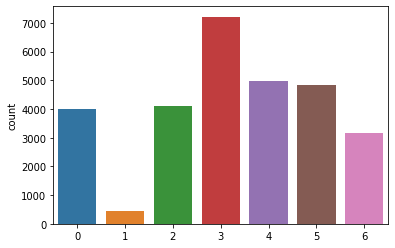

In [ ]:
import seaborn as sns
y = np.argmax(label, axis = 1)
sns.countplot(y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


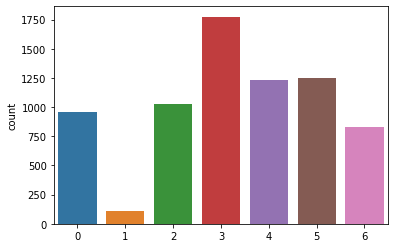

In [ ]:
ly = np.argmax(label_y, axis = 1)
sns.countplot(ly)

In [ ]:
import gc
gc.collect()

4538

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),loss="categorical_crossentropy",metrics=["accuracy"])
his1=model.fit (total_X, label, epochs=20, batch_size=256, verbose=1)

Epoch 1/20
113/113 [==============================] - 8s 55ms/step - loss: 1.9189 - accuracy: 0.2523
Epoch 2/20
113/113 [==============================] - 6s 54ms/step - loss: 1.6833 - accuracy: 0.3313
Epoch 3/20
113/113 [==============================] - 6s 54ms/step - loss: 1.5666 - accuracy: 0.3881
Epoch 4/20
113/113 [==============================] - 6s 54ms/step - loss: 1.4798 - accuracy: 0.4275
Epoch 5/20
113/113 [==============================] - 6s 54ms/step - loss: 1.4018 - accuracy: 0.4576
Epoch 6/20
113/113 [==============================] - 6s 54ms/step - loss: 1.3403 - accuracy: 0.4849
Epoch 7/20
113/113 [==============================] - 6s 54ms/step - loss: 1.2884 - accuracy: 0.5052
Epoch 8/20
113/113 [==============================] - 6s 54ms/step - loss: 1.2421 - accuracy: 0.5281
Epoch 9/20
113/113 [==============================] - 6s 54ms/step - loss: 1.2014 - accuracy: 0.5420
Epoch 10/20
113/113 [==============================] - 6s 54ms/step - loss: 1.1612 - accura

In [ ]:
import gc
gc.collect()

6406

In [ ]:
y_pred = model.predict(total_y)
yp = np.argmax(y_pred, axis = 1)
yt = np.argmax(label_y, axis = 1)
yp

array([0, 0, 3, ..., 6, 2, 6])

In [ ]:
accuracy_score(yt, yp)

0.532320980774589

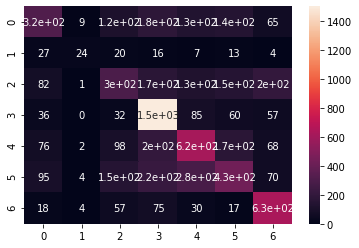

In [ ]:
cm = confusion_matrix(yt, yp)
sns.heatmap(cm, annot = True)

In [ ]:
print(classification_report(yt, yp))

              precision    recall  f1-score   support

           0       0.49      0.33      0.39       958
           1       0.55      0.22      0.31       111
           2       0.39      0.29      0.33      1024
           3       0.64      0.85      0.73      1774
           4       0.48      0.50      0.49      1233
           5       0.44      0.34      0.39      1247
           6       0.58      0.76      0.65       831

    accuracy                           0.53      7178
   macro avg       0.51      0.47      0.47      7178
weighted avg       0.51      0.53      0.51      7178



In [ ]:
from tensorflow.keras. applications import EfficientNetB0
en = EfficientNetB0(include_top = False, weights = 'imagenet', input_shape = (50, 50, 3))

In [ ]:
model2 = Sequential()
model2.add(en)
model2.add(Dropout(0.7))
model2.add(Dense(32, activation = 'relu'))
#model2.add(Dropout(0.8))
#model2.add(Dense(800, activation = 'relu'))
#model2.add(Dropout(0.7))
model2.add(Flatten())
model2.add(Dropout(0.9))
model2.add(Dense(7, activation = 'softmax'))
model2.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb0 (Functional)  (None, 2, 2, 1280)        4049571   
_________________________________________________________________
dropout_83 (Dropout)         (None, 2, 2, 1280)        0         
_________________________________________________________________
dense_73 (Dense)             (None, 2, 2, 32)          40992     
_________________________________________________________________
flatten_34 (Flatten)         (None, 128)               0         
_________________________________________________________________
dropout_84 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_74 (Dense)             (None, 7)                 903       
Total params: 4,091,466
Trainable params: 4,049,443
Non-trainable params: 42,023
______________________________________

In [ ]:
model2.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3),loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
BATCH_SIZE = 256
history = model2.fit(total_X, label,batch_size = BATCH_SIZE,epochs=3)

Epoch 1/3
113/113 [==============================] - 25s 112ms/step - loss: 0.8004 - accuracy: 0.7356
Epoch 2/3
113/113 [==============================] - 13s 113ms/step - loss: 0.3350 - accuracy: 0.8918
Epoch 3/3
113/113 [==============================] - 13s 113ms/step - loss: 0.2671 - accuracy: 0.9138


In [ ]:
 #predicting the test data
y_pred1 = model2.predict(total_y)
yp1 = np.argmax(y_pred1,axis = 1)
yp1

array([5, 0, 3, ..., 2, 5, 6])

In [ ]:
accuracy_score(yt, yp1)

0.6246865422123155

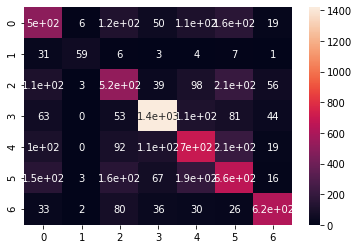

In [ ]:
cm = confusion_matrix(yt,yp1)
sns.heatmap(cm, annot = True)

In [ ]:
print(classification_report(yt, yp1))

              precision    recall  f1-score   support

           0       0.51      0.52      0.51       958
           1       0.81      0.53      0.64       111
           2       0.51      0.50      0.51      1024
           3       0.83      0.80      0.81      1774
           4       0.56      0.57      0.57      1233
           5       0.49      0.53      0.51      1247
           6       0.80      0.75      0.78       831

    accuracy                           0.62      7178
   macro avg       0.64      0.60      0.62      7178
weighted avg       0.63      0.62      0.63      7178



In [ ]:
from tensorflow.keras. applications import ResNet50

In [ ]:
rn = ResNet50(include_top= False, input_shape = (50, 50, 3), weights = 'imagenet')

In [ ]:
# Create the model
model3 = Sequential()

# Add the vgg  model
model3.add(rn)

# Add new layers
model3.add(Flatten())
model3.add(Dense(1024, activation='relu'))

model3.add(BatchNormalization())


#model3.add(Dense(512, activation='relu'))

#model3.add(BatchNormalization())

#model3.add(Dense(256, activation='relu'))

#model3.add(BatchNormalization())

model3.add(Dropout(0.5))

model3.add(Dense(7, activation='softmax'))
model3.summary()

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2, 2, 2048)        23587712  
_________________________________________________________________
flatten_40 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_84 (Dense)             (None, 1024)              8389632   
_________________________________________________________________
batch_normalization_42 (Batc (None, 1024)              4096      
_________________________________________________________________
dropout_87 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_85 (Dense)             (None, 7)                 7175      
Total params: 31,988,615
Trainable params: 31,933,447
Non-trainable params: 55,168
____________________________________

In [ ]:
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model3.fit(total_X,label, epochs = 5, batch_size = 512)

Epoch 1/5
57/57 [==============================] - 17s 221ms/step - loss: 0.3108 - accuracy: 0.9026
Epoch 2/5
57/57 [==============================] - 13s 221ms/step - loss: 0.2066 - accuracy: 0.9314
Epoch 3/5
57/57 [==============================] - 13s 221ms/step - loss: 0.1157 - accuracy: 0.9626
Epoch 4/5
57/57 [==============================] - 13s 221ms/step - loss: 0.1238 - accuracy: 0.9592
Epoch 5/5
57/57 [==============================] - 13s 221ms/step - loss: 0.1859 - accuracy: 0.9383


In [ ]:
 #predicting the test data
y_pred3 = model3.predict(total_y)
yp1 = np.argmax(y_pred3,axis = 1)
yp1

array([2, 5, 3, ..., 6, 6, 6])

In [ ]:
accuracy_score(yt, yp1)

0.5200612984118139

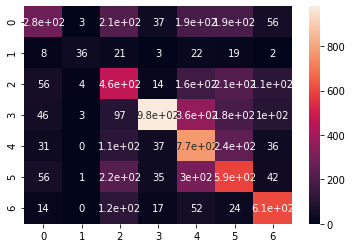

In [ ]:
cm = confusion_matrix(yt,yp1)
sns.heatmap(cm, annot = True)

In [ ]:
print(classification_report(yt, yp1))

              precision    recall  f1-score   support

           0       0.57      0.29      0.39       958
           1       0.77      0.32      0.46       111
           2       0.37      0.45      0.41      1024
           3       0.87      0.55      0.68      1774
           4       0.42      0.63      0.50      1233
           5       0.41      0.48      0.44      1247
           6       0.63      0.73      0.68       831

    accuracy                           0.52      7178
   macro avg       0.58      0.49      0.51      7178
weighted avg       0.57      0.52      0.52      7178

